# Student Performance With Linear Regression

## Libraries

In [1]:
import copy, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lab_utils_common import dlc
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2) 

## Loading and checking data

In [2]:
# loading data
ar = "student_performance_data.csv"
df =pd.read_csv(ar,sep=',', encoding='latin1', decimal='.') 
# show
df.shape

(2392, 15)

In [3]:
# shows first x rows
df.head(5)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [4]:
# show dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### Study Habits of the students

In [47]:
# The first analysis is based on Study Habits of the students
x_train = np.array(df[['StudyTimeWeekly', 'Absences', 'Tutoring']])
y_train = np.array(df['GradeClass'])
X_features = ['StudyTimeWeekly','Absences','Tutoring']

Let's view the dataset and its features by plotting each feature versus price.

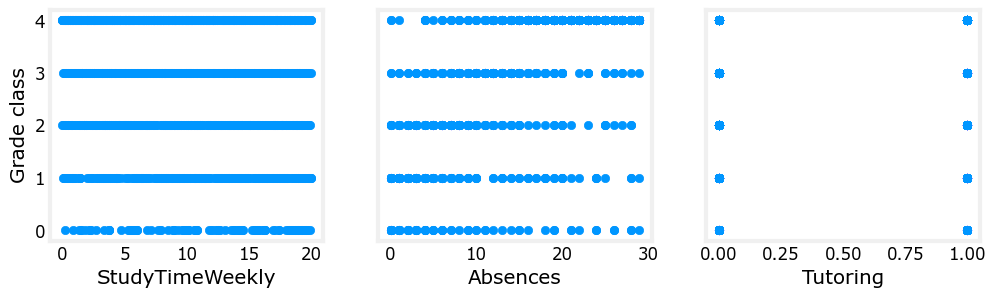

In [49]:
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Grade class")
plt.show()

As we can see, none of the Study Habits ('StudyTimeWeekly','Absences','Tutoring') have great impact in grades. In all examples, students can perfom every action more or less and get the same score.

### Demographic Details

In [6]:
# The first analysis is based on Demographic Details of the students
x_train_dd = np.array(df[['Age', 'Gender', 'Ethnicity', 'ParentalEducation']])
y_train_dd = np.array(df['GradeClass'])
X_features_dd = ['Age', 'Gender', 'Ethnicity', 'ParentalEducation']

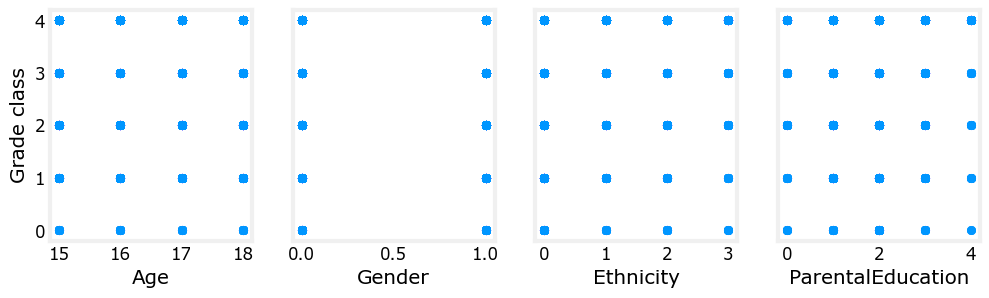

In [8]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train_dd[:,i],y_train_dd)
    ax[i].set_xlabel(X_features_dd[i])
ax[0].set_ylabel("Grade class")
plt.show()

### Parental Involvement

In [10]:
# The first analysis is based on Parental Involvement of the students
x_train_pi = np.array(df[['ParentalSupport']])
y_train_pi = np.array(df['GradeClass'])
X_features_pi = ['ParentalSupport']

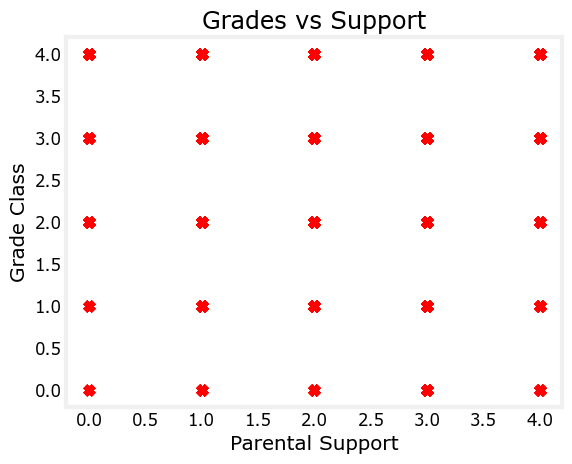

In [14]:
# Plot the data points
plt.scatter(x_train_pi, y_train_pi, marker='x', c='r')
# Set the title
plt.title("Grades vs Support")
# Set the y-axis label
plt.ylabel('Grade Class')
# Set the x-axis label
plt.xlabel('Parental Support')
plt.show()

### Extracurricular Activities

In [16]:
# The first analysis is based on Extracurricular Activities of the students
x_train_ea = np.array(df[['Extracurricular', 'Sports', 'Music', 'Volunteering']])
y_train_ea = np.array(df['GradeClass'])
X_features_ea = ['Extracurricular', 'Sports', 'Music', 'Volunteering']

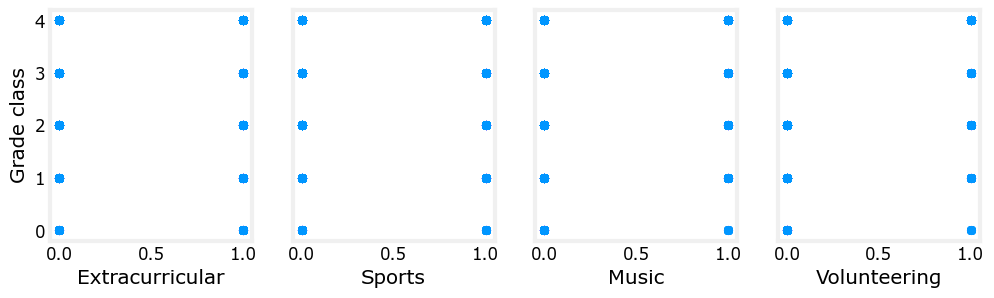

In [17]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train_ea[:,i],y_train_ea)
    ax[i].set_xlabel(X_features_ea[i])
ax[0].set_ylabel("Grade class")
plt.show()

## Parameter vector w, b

In [14]:
b_init = 0.1
w_init = np.array([ 0.1, 0.1, 0.1])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (3,), b_init type: <class 'float'>


## Model Prediction With Multiple Variables

### Single Prediction, vector

In [15]:
def predict(x, w, b): 
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b     
    return p   

In [19]:
# get a row from our training data
x_vec = x_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction, this is just a test
f_wb = predict(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")
print(f"Real value: {y_train[0]}")

x_vec shape (3,), x_vec value: [19.83  7.    1.  ]
f_wb shape (), prediction: 2.883372280785472
Real value: 2.0


### Cost function

In [20]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [21]:
# Compute and display cost using our pre-chosen optimal parameters. 
# We need to optimize this!!!
cost = compute_cost(x_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 0.7126603883359016


## Gradient Descent With Multiple Variables

In [22]:
# Get w and b
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [23]:
# This function is repeated until convergence
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In the next cell you will test the implementation.

In [45]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 1.001
# some gradient descent settings
iterations = 10000
alpha = 5.0e-6
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

# Test our w and b values
m,_ = x_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost     2.72   
Iteration 1000: Cost     0.49   
Iteration 2000: Cost     0.42   
Iteration 3000: Cost     0.40   
Iteration 4000: Cost     0.40   
Iteration 5000: Cost     0.39   
Iteration 6000: Cost     0.39   
Iteration 7000: Cost     0.38   
Iteration 8000: Cost     0.38   
Iteration 9000: Cost     0.38   
b,w found by gradient descent: 1.01,[ 0.01  0.12 -0.  ] 
prediction: 2.03, target value: 2.0
prediction: 1.13, target value: 1.0
prediction: 4.26, target value: 4.0
prediction: 2.82, target value: 3.0
prediction: 3.15, target value: 4.0
prediction: 1.07, target value: 1.0
prediction: 2.37, target value: 2.0
prediction: 3.85, target value: 4.0
prediction: 1.17, target value: 2.0
prediction: 1.15, target value: 0.0
prediction: 2.46, target value: 3.0
prediction: 2.93, target value: 4.0
prediction: 3.69, target value: 4.0
prediction: 3.70, target value: 4.0
prediction: 2.21, target value: 3.0
prediction: 3.19, target value: 4.0
prediction: 2.82, target value: 3.0
p

## Feature Scaling

Implementation

In [50]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 
#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

Let's look at the steps involved in Z-score normalization.

In [52]:
# Calculate precious values
#mu     = np.mean(x_train,axis=0)   
#sigma  = np.std(x_train,axis=0) 
#X_mean = (x_train - mu)
# X_norm = (x_train - mu)/sigma 

# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(x_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [ 9.77 14.54  0.3 ], 
X_sigma = [5.65 8.47 0.46]
Peak to Peak range by column in Raw        X:[19.98 29.    1.  ]
Peak to Peak range by column in Normalized X:[3.53 3.43 2.18]


Train again with normalized values

In [56]:
# initialize parameters
initial_w_n = np.zeros_like(w_init)
initial_b_n = 0.1
# some gradient descent settings
iterations = 10000
alpha = 1.0e-1
# run gradient descent 
w_final_n, b_final_n, J_hist_n = gradient_descent(X_norm, y_train, initial_w_n, initial_b_n,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

# Test our w and b values
m,_ = X_norm.shape
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_final_n) + b_final_n
    print(f"prediction: {np.dot(X_norm[i], w_final_n) + b_final_n:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost     4.05   
Iteration 1000: Cost     0.33   
Iteration 2000: Cost     0.33   
Iteration 3000: Cost     0.33   
Iteration 4000: Cost     0.33   
Iteration 5000: Cost     0.33   
Iteration 6000: Cost     0.33   
Iteration 7000: Cost     0.33   
Iteration 8000: Cost     0.33   
Iteration 9000: Cost     0.33   
b,w found by gradient descent: 1.01,[ 0.01  0.12 -0.  ] 
prediction: 1.70, target value: 2.0
prediction: 1.35, target value: 1.0
prediction: 4.45, target value: 4.0
prediction: 3.00, target value: 3.0
prediction: 3.22, target value: 4.0
prediction: 1.57, target value: 1.0
prediction: 2.40, target value: 2.0
prediction: 3.42, target value: 4.0
prediction: 1.78, target value: 2.0
prediction: 1.26, target value: 0.0
prediction: 2.62, target value: 3.0
prediction: 3.18, target value: 4.0
prediction: 3.74, target value: 4.0
prediction: 3.68, target value: 4.0
prediction: 2.17, target value: 3.0
prediction: 3.06, target value: 4.0
prediction: 2.99, target value: 3.0
p

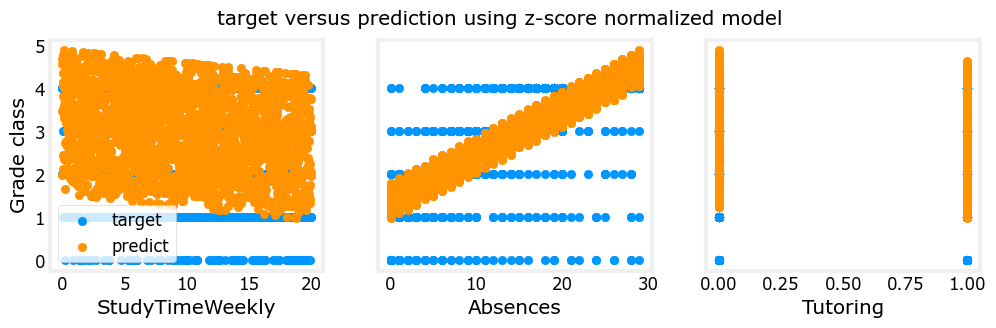

In [61]:
# plot predictions and targets versus original features    
fig,ax=plt.subplots(1,3,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(x_train[:,i],yp,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Grade class"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()